In [48]:
# Author: Nathan LaPierre
# This script takes the processed results and makes the plots for the Metalign paper
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_context("talk")

In [42]:
def prepare_cami1_metrics_df(df):
    df['1 - (L1 error / 2)'] = 1 - (df['L1 norm error'] / 2)
    df['1 - (UniFrac / 14)'] = 1 - (df['Weighted UniFrac error'] / 14)
    df = df.rename(columns={'Purity (precision)': 'Precision', 'Completeness (recall)': 'Recall'})
    df = df.sort_values('F1 score', ascending=False)
    ''' NOTE: Taxy-Pro1 is removed so that seaborn doesn't repeat colors in the charts.
        You can comment out or delete this line to see it.
        The other TaxyPro submission has the best UniFrac, while Taxy-Pro1 doesn't stand out in any metric
          (for instance TIPP and metalign both outperformed Taxy-Pro1 in every metric), so we kept Taxy-Pro2.
    '''
    df = df.drop('Taxy-Pro1')  
    return df

In [43]:
all_rank_df = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_all_level.tsv', sep='\t', index_col=0, header=0)
genus_rank_df = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_genus_level.tsv', sep='\t', index_col=0, header=0)
species_rank_df = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_species_level.tsv', sep='\t', index_col=0, header=0)
all_rank_df = prepare_cami1_metrics_df(all_rank_df)
genus_rank_df = prepare_cami1_metrics_df(genus_rank_df)
species_rank_df = prepare_cami1_metrics_df(species_rank_df)
genus_rank_df

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,1 - (L1 error / 2),1 - (UniFrac / 14)
metalign,0.801928,0.804067,0.799229,0.667663,0.500087,8.028457,metalign,0.749957,0.426539
Metaphlan2,0.778522,0.343388,0.474758,0.312093,1.427284,10.897971,Metaphlan2,0.286358,0.221573
CommonKmers,0.681932,0.304774,0.404291,0.255681,1.257188,10.455989,CommonKmers,0.371406,0.253144
mOTU,0.264297,0.351781,0.291802,0.173193,1.410760,10.857634,mOTU,0.294620,0.224455
FOCUS,0.208532,0.298844,0.239395,0.137940,1.285426,10.052114,FOCUS,0.357287,0.281992
Quickr,0.142870,0.595879,0.223361,0.128455,1.502909,9.325096,Quickr,0.248546,0.333922
TIPP,0.147626,0.427477,0.211356,0.120535,1.235265,9.827967,TIPP,0.382368,0.298002
Metaphyler,0.112897,0.434047,0.173198,0.096443,1.193116,9.574678,Metaphyler,0.403442,0.316094
Taxy-Pro2,0.111118,0.422351,0.169724,0.094432,1.388670,8.018896,Taxy-Pro2,0.305665,0.427222
CLARK,0.067581,0.671618,0.120738,0.065177,1.198941,8.154753,CLARK,0.400530,0.417518


In [7]:
def prepare_per_dataset_df(df, asc=False):
    df = df.sort_values(1, ascending=asc)
    ''' NOTE: Taxy-Pro1 is removed so that seaborn doesn't repeat colors in the charts.
        You can comment out or delete this line to see it.
        The other TaxyPro submission has the best UniFrac, while Taxy-Pro1 doesn't stand out in any metric
          (for instance TIPP and metalign both outperformed Taxy-Pro1 in every metric), so we kept Taxy-Pro2.
    '''
    df = df.drop('Taxy-Pro1')  
    return df

In [8]:
per_dataset_all_f1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_all_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_genus_f1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_genus_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_species_f1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_species_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_all_f1 = prepare_per_dataset_df(per_dataset_all_f1, asc=False)
per_dataset_genus_f1 = prepare_per_dataset_df(per_dataset_genus_f1, asc=False)
per_dataset_species_f1 = prepare_per_dataset_df(per_dataset_species_f1, asc=False)
per_dataset_genus_f1

,1,2,3,4,5,6,7,8
0,,,,,,,,
metalign,0.804290,0.811189,0.855696,0.844221,0.826531,0.730769,0.742424,0.778711
Metaphlan2,0.459259,0.553571,0.450909,0.450909,0.452555,0.451613,0.523364,0.455882
CommonKmers,0.386100,0.533333,0.415385,0.409091,0.392308,0.264151,0.433962,0.400000
mOTU,0.309645,0.289362,0.331658,0.321782,0.340000,0.082645,0.324324,0.335000
Quickr,0.285714,0.151986,0.292441,0.281928,0.290954,0.051064,0.138614,0.294190
FOCUS,0.276190,0.233333,0.281030,0.289720,0.278846,0.046154,0.228856,0.281030
TIPP,0.269919,0.145749,0.273752,0.272873,0.268987,0.032877,0.157895,0.268800
Metaphyler,0.224000,0.123499,0.225464,0.224868,0.222805,0.022059,0.118616,0.224274
Taxy-Pro2,0.218329,0.102649,0.223390,0.224868,0.229111,0.031373,0.103203,0.224868


In [9]:
per_dataset_all_l1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_all_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_genus_l1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_genus_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_species_l1 = pd.read_csv('processed_results/1cami_opal_summaries_default_only/1cami_opal_summary_species_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_all_l1 = prepare_per_dataset_df(per_dataset_all_l1, asc=True)
per_dataset_genus_l1 = prepare_per_dataset_df(per_dataset_genus_l1, asc=True)
per_dataset_species_l1 = prepare_per_dataset_df(per_dataset_species_l1, asc=True)
per_dataset_genus_l1

,1,2,3,4,5,6,7,8
0,,,,,,,,
metalign,0.380559,0.418404,0.392817,0.398279,0.439182,0.583607,0.991824,0.396024
CLARK,1.054382,1.207557,1.061476,1.040064,1.117181,1.753217,1.246333,1.111317
Metaphyler,1.064379,0.941795,1.110796,1.076058,1.120718,1.743716,1.380371,1.107097
TIPP,1.140220,0.981785,1.170764,1.140529,1.203929,1.760071,1.301593,1.183226
FOCUS,1.166812,1.245996,1.141064,1.128469,1.221668,1.737821,1.476204,1.165373
CommonKmers,1.188720,1.078210,1.188263,1.143649,1.216348,1.744422,1.270423,1.227466
Taxy-Pro2,1.310483,1.242204,1.305838,1.288924,1.323530,1.803768,1.538732,1.295879
mOTU,1.371367,1.275131,1.352890,1.335900,1.345318,1.775658,1.444711,1.385106
Metaphlan2,1.419327,1.184451,1.468711,1.484692,1.447361,1.658535,1.295336,1.459861


In [130]:
def plot_panel_figure_cami1(df, per_dataset_f1, per_dataset_l1, level):
    figure(num=None, figsize=(16, 16), dpi=160, facecolor='w', edgecolor='k')
    plt.subplots_adjust(hspace = 0.5)
    methods = list(df.index)

    # Heatmap of metrics
    plt.subplot(2, 2, 1)
    ax = sns.heatmap(df.drop(labels=['Method', 'Weighted UniFrac error', 'L1 norm error'], axis=1), annot=True)
    plt.xticks(rotation=90)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('A')

    # Scatterplot of precision vs. recall
    ax=plt.subplot(2, 2, 2)
    markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h']
    for i in range(len(methods)):
        plt.scatter(df['Precision'][methods[i]], df['Recall'][methods[i]], marker=markers[i], label=methods[i]) 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax.set_title('B')

    # Violinplot of F1 Score over all datasets
    plt.subplot(2, 2, 3)
    ax=sns.violinplot(data=per_dataset_f1.T, inner="points", palette='muted', cut=0.0)
    ax.set(xlabel="", ylabel="F1 Score")
    plt.xticks(rotation=90)
    ax.set_title('C')
    #plt.savefig("figures/cami1_f1_violins_genus_defaultonly.png", bbox_inches='tight')

    # Violinplot of L1 norm error over all datasets
    plt.subplot(2, 2, 4)
    ax=sns.violinplot(data=per_dataset_l1.T, inner="points", palette='muted', cut=0.0)
    ax.set(xlabel="", ylabel="L1 norm error")
    plt.xticks(rotation=90)
    ax.set_title('D')
    plt.savefig("figures/CAMI1_"+level+"_results.png", bbox_inches='tight')

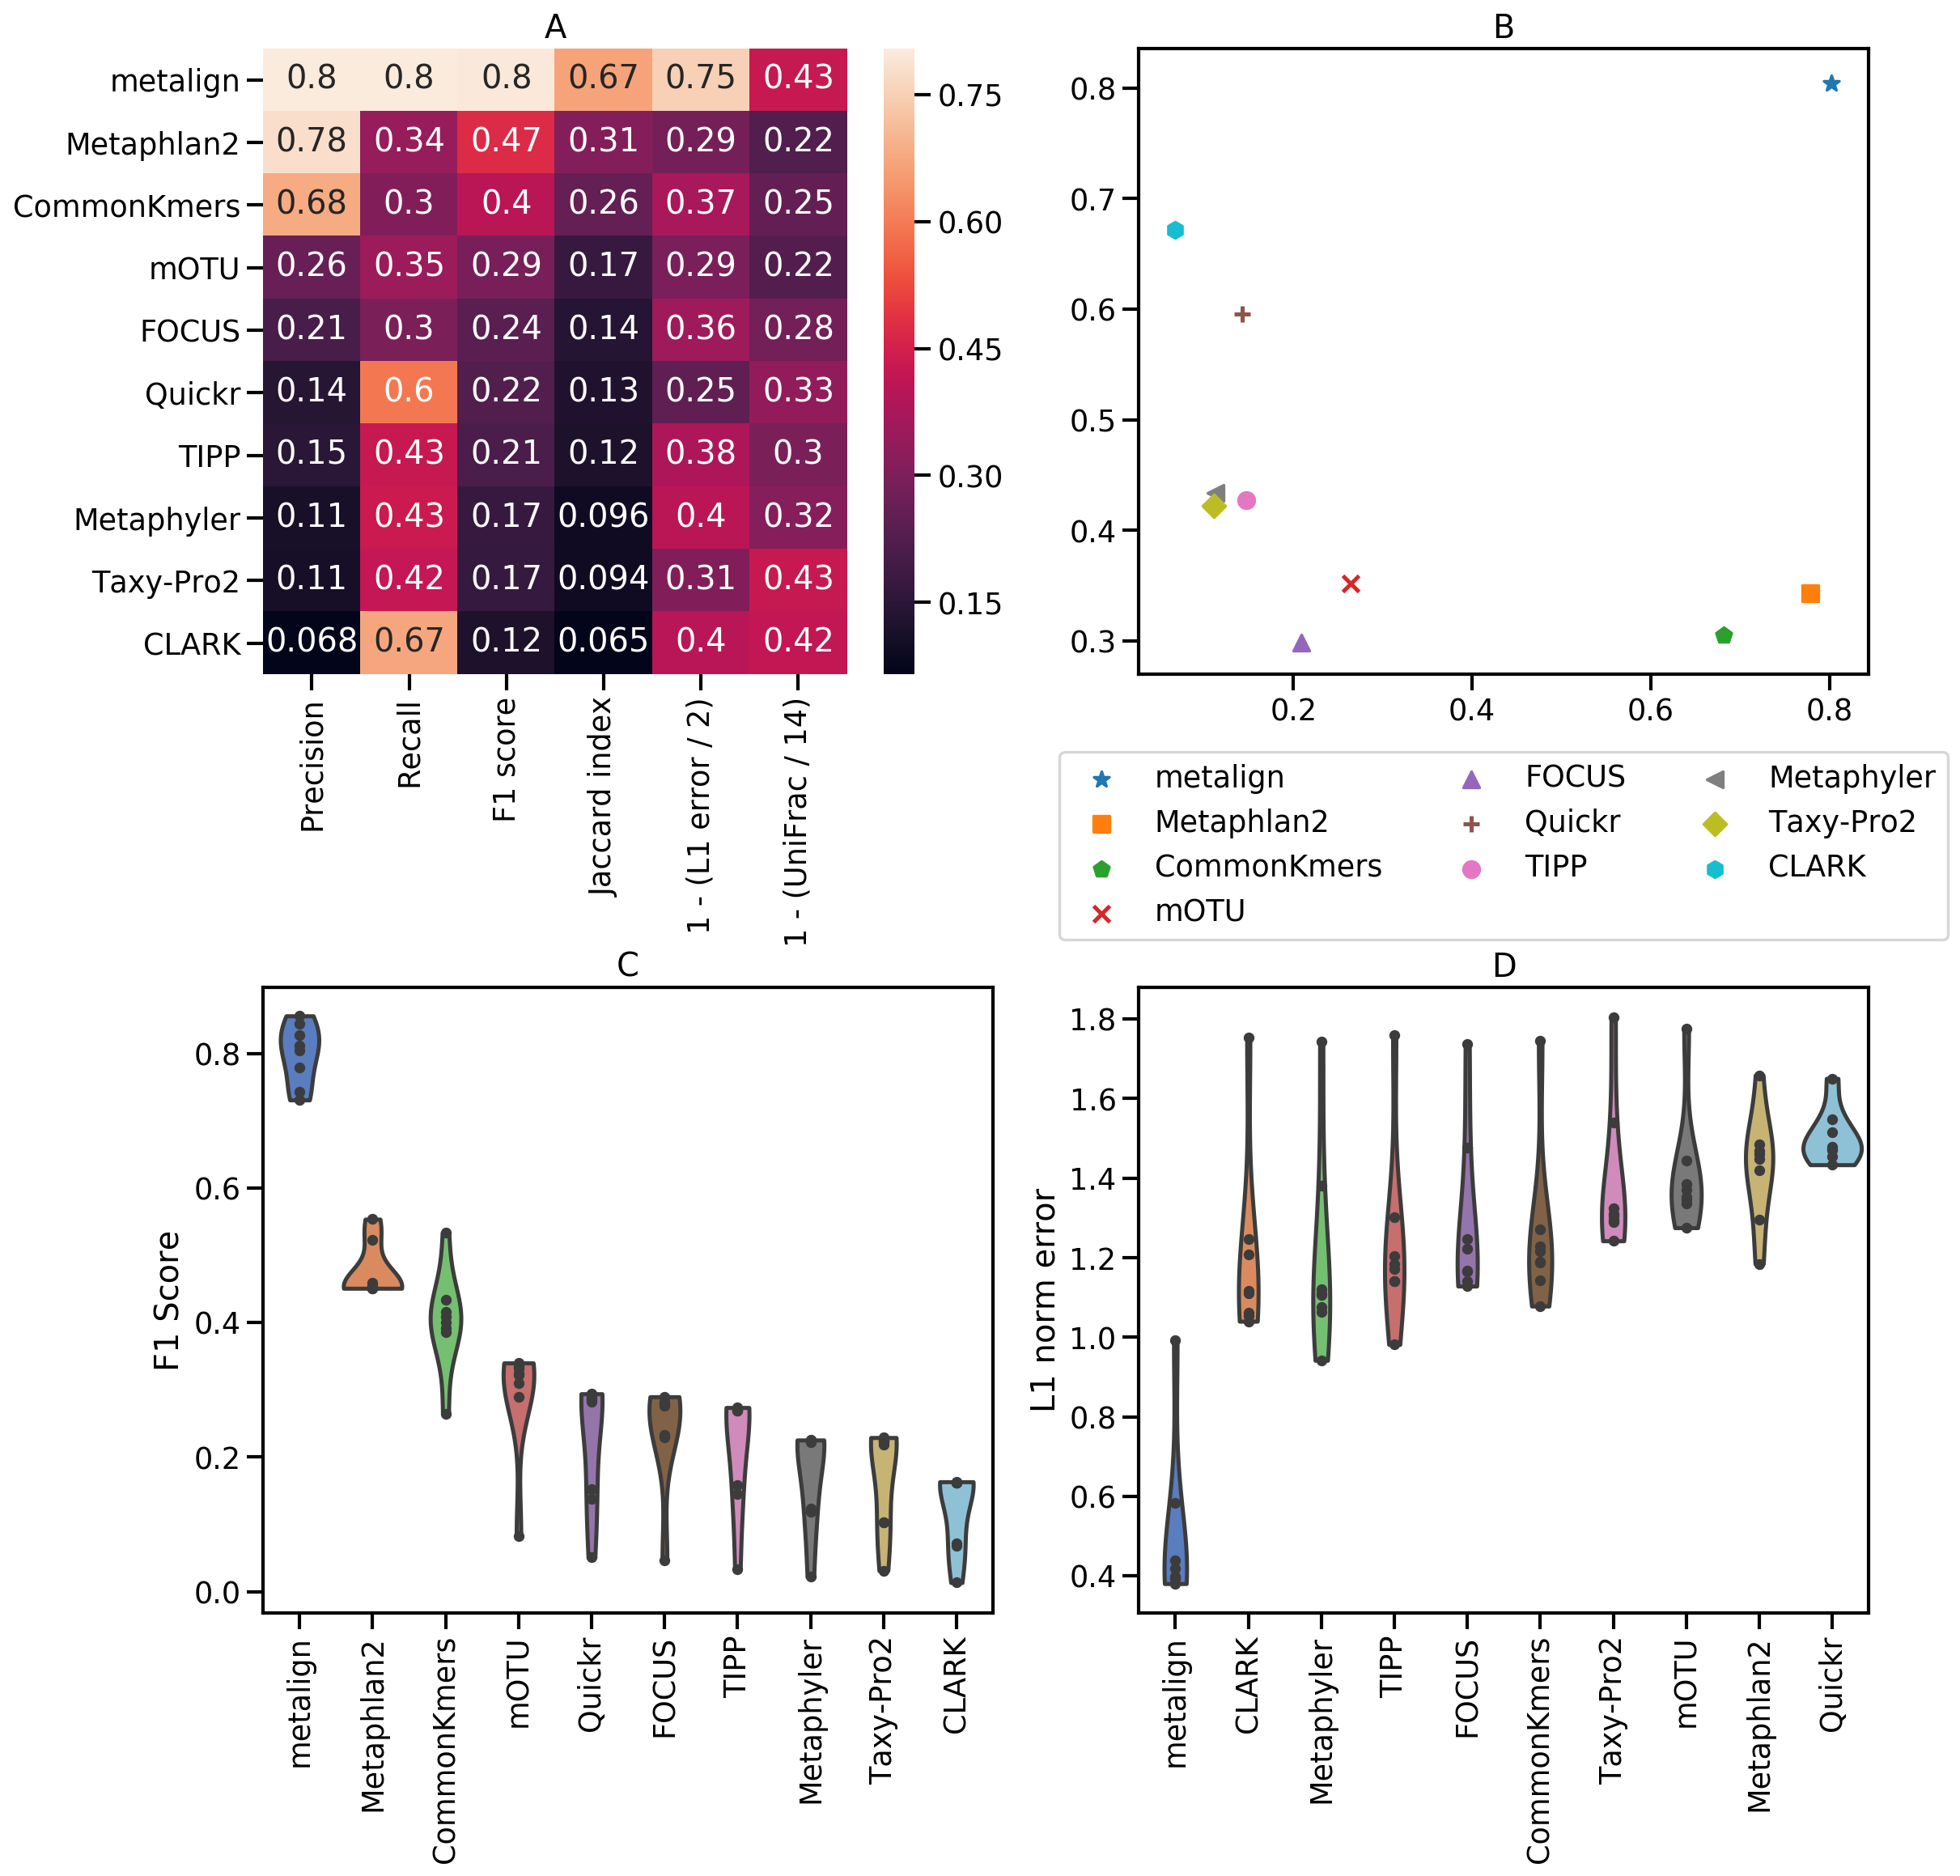

In [131]:
plot_panel_figure_cami1(genus_rank_df, per_dataset_genus_f1, per_dataset_genus_l1, 'genus')

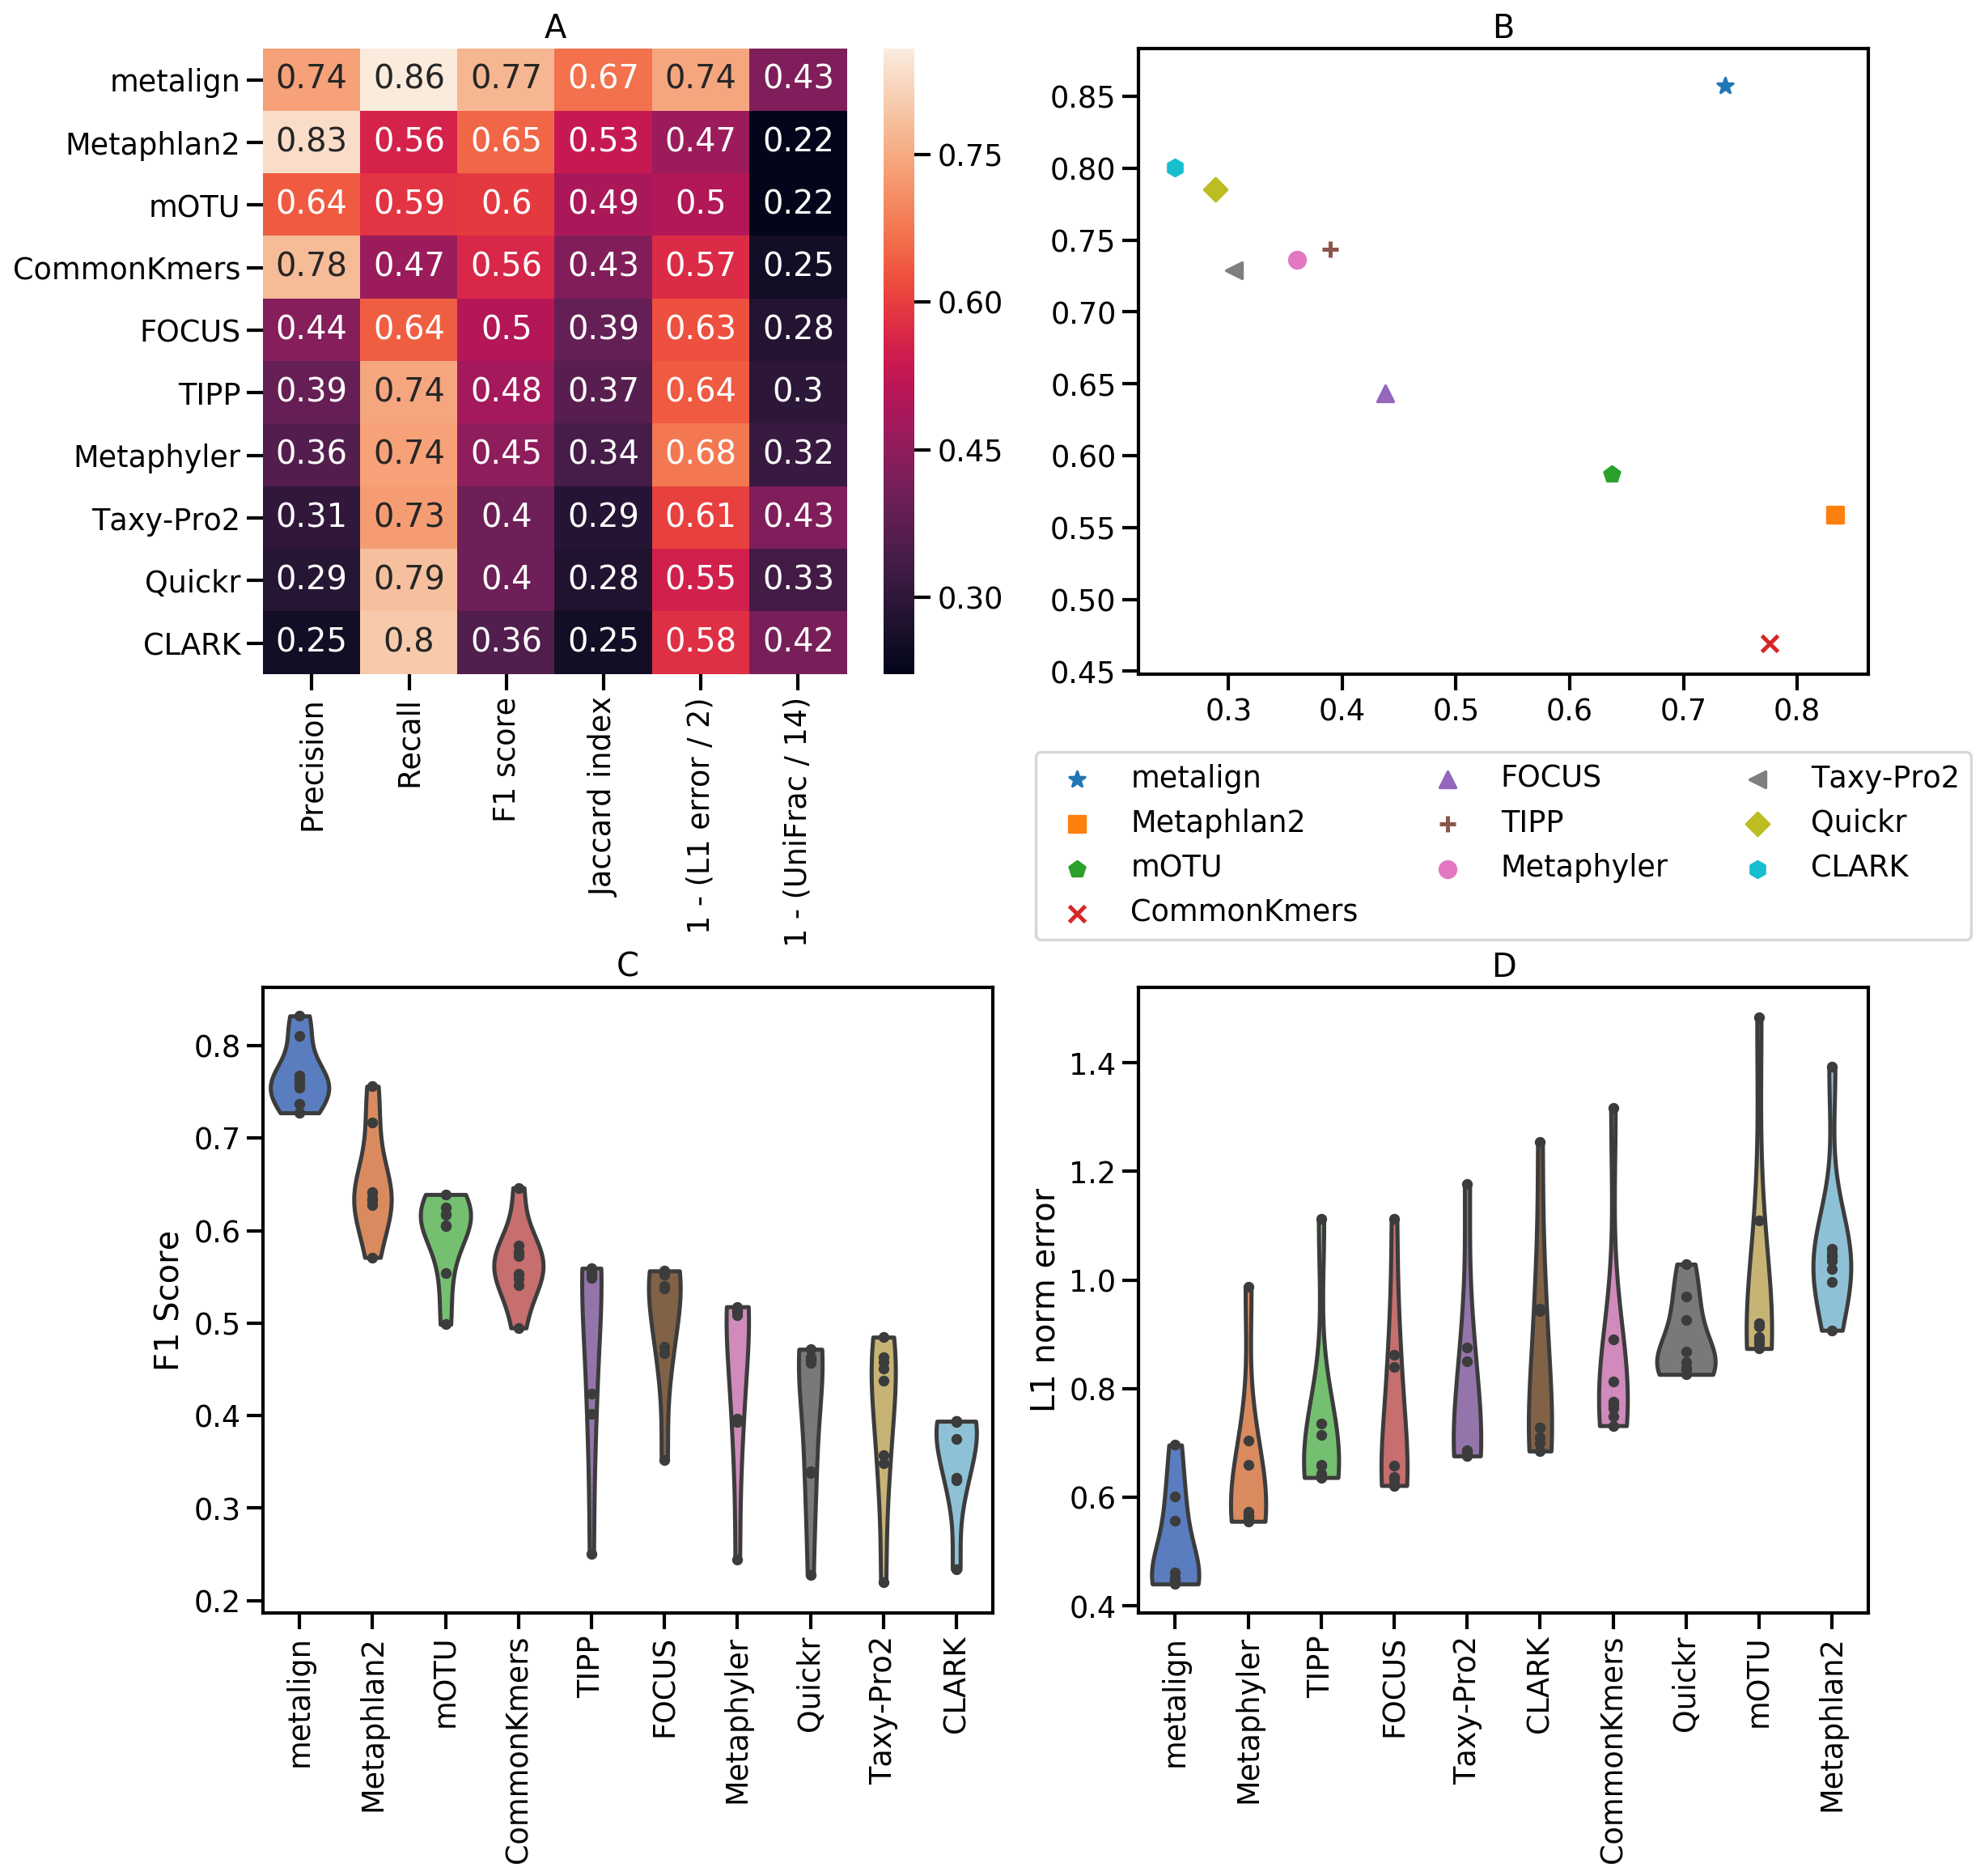

In [132]:
plot_panel_figure_cami1(all_rank_df, per_dataset_all_f1, per_dataset_all_l1, 'all')

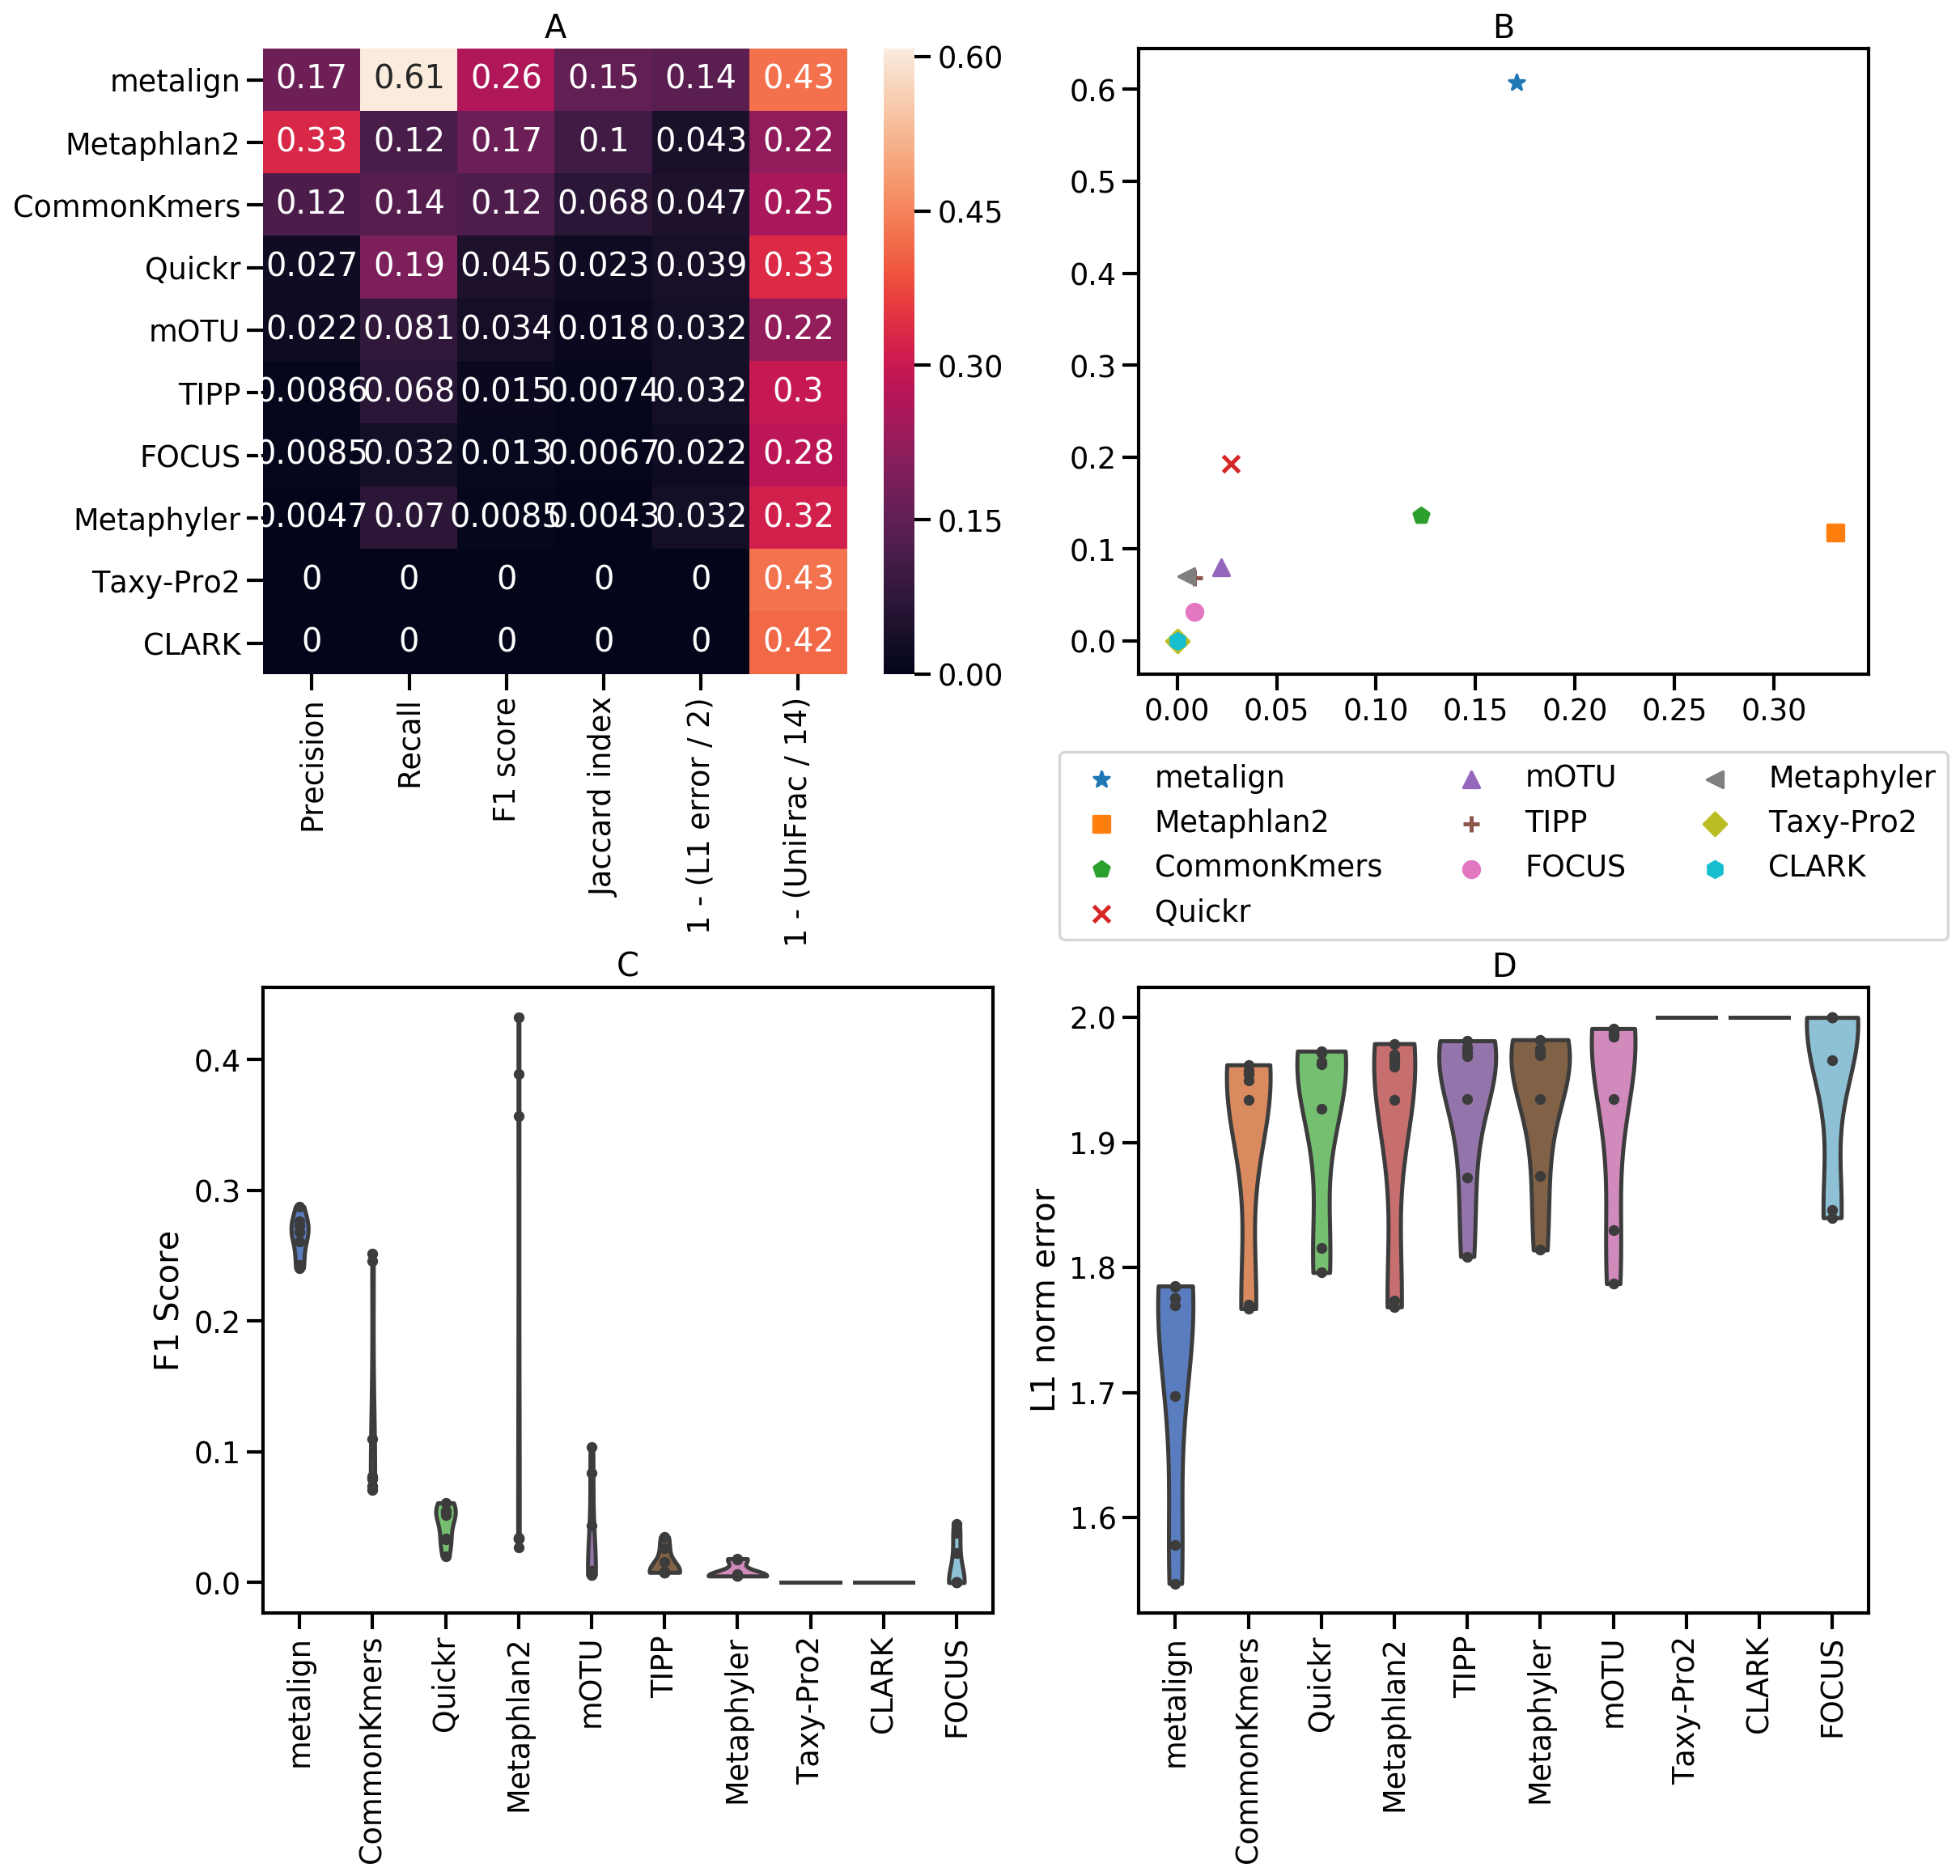

In [133]:
plot_panel_figure_cami1(species_rank_df, per_dataset_species_f1, per_dataset_species_l1, 'species')

In [12]:
tara_timing_all = pd.read_csv('processed_results/tara_oceans/timing_tara_oceans_prokaryotes_all.tsv', sep='\t', index_col=0, header=None)
tara_timing_all
#tara_timing_dcm = pd.read_csv('processed_results/tara_oceans/timing_tara_oceans_prokaryotes_dcm.tsv', sep='\t', index_col=0, header=None)
#tara_timing_dcm

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
Metalign,68,23,21,18,12,20,146,123,23,123
Kraken2,21,7,4,4,3,6,22,20,6,23
MetaPhlAn2,253,53,53,55,37,82,369,321,81,339
mOTUs2,168,35,35,34,24,48,220,194,51,228


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

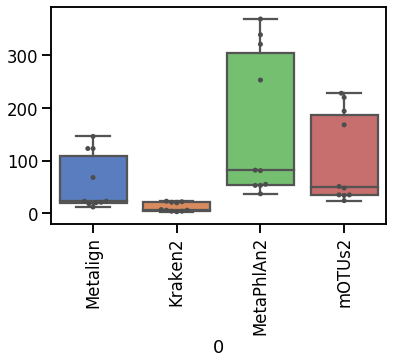

In [13]:
sns.boxplot(data=tara_timing_all.T, palette='muted')
sns.swarmplot(data=tara_timing_all.T, size=5, color=".3", linewidth=0)
#sns.boxplot(data=tara_timing_dcm.T, palette='muted')
#sns.swarmplot(data=tara_timing_dcm.T, size=5, color=".3", linewidth=0)
plt.xticks(rotation=90)

In [14]:
tara_subset_timing = pd.read_csv('processed_results/tara_oceans/timing_tara_oceans_prokaryotes_subset_test.tsv', sep='\t', index_col=0)
del tara_subset_timing["0.1"]
tara_subset_timing

,1,10,100
Metalign,5.450,11.900,66.033
Kraken2,0.700,1.733,11.983
MetaPhlAn2,2.117,16.050,151.267
mOTUs2,1.167,10.550,109.467


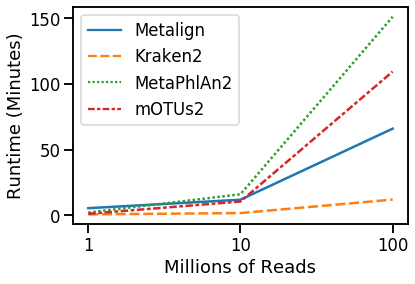

In [46]:
ax = sns.lineplot(data=tara_subset_timing.T, palette="tab10", linewidth=2.5)
ax.set(xlabel="Millions of Reads", ylabel="Runtime (Minutes)")
plt.savefig("figures/tara_subset_timing.png", bbox_inches='tight')

In [147]:
mock_df = pd.read_csv('processed_results/mock_community/metalign_mock_community_data_f1_vs_cutoff.tsv', sep='\t', index_col=0, header=0)
mock_df.T

,Metalign,Kraken2 + Bracken,mOTUs2,MetaPhlAn2
No cutoff,0.889,0.033,0.615,0.875
0.1% cutoff,0.933,0.640,0.615,0.875
1% cutoff,1.000,0.889,0.615,0.875
5% cutoff,1.000,1.000,0.545,0.933
8% cutoff,0.769,0.545,0.545,0.769


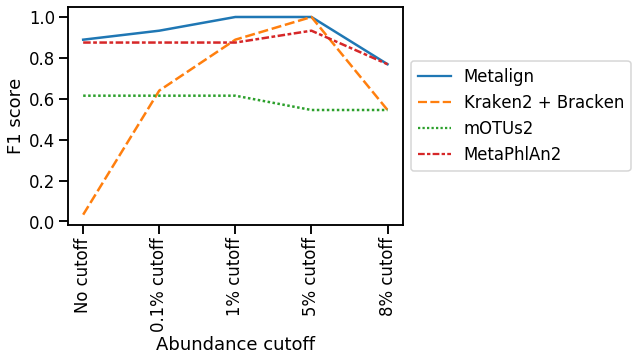

In [148]:
plt.figure()
ax = sns.lineplot(data=mock_df.T, palette="tab10", linewidth=2.5, sort=False)
plt.xticks(rotation=90)
ax.set(xlabel="Abundance cutoff", ylabel="F1 score")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("figures/mock_f1_vs_cutoff.png", bbox_inches='tight')